In [15]:
from ESPN import scaps as sp
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

In [24]:
df = pd.read_csv("free_agents.csv")

# Calculate coefficient of variation
df = df[df['Average'] != "--"]
df = df[df['SD'] != "--"]
df['Average'] = df['Average'].astype(float)
df['SD'] = df['SD'].astype(float)
df['CV'] = round((df['SD'] / df['Average']) * 100,2)
df = df.drop(df.columns[0], axis=1)
df = df.reset_index(drop=True)
df.head(10)

,Name,Team,Average,Last 5,SD,CV
0,Brandon Ingram,NOP,32.75,"('--', 26, 21, 51, 33)",13.12,40.06
1,Jordan Poole,WAS,32.00,"(52, 26, 12, 46, 24)",16.55,51.72
2,Josh Giddey,OKC,28.00,"(25, 32, 20, 37, 26)",6.60,23.57
3,Keegan Murray,SAC,31.40,"(51, 31, 26, 31, 18)",12.18,38.79
4,Keldon Johnson,SAS,22.60,"(20, 11, 24, 36, 22)",8.99,39.78
5,John Collins,UTA,26.67,"(39, '--', 24, 17, '--')",11.24,42.14
6,Buddy Hield,PHI,16.00,"(16, 8, 18, 20, 18)",4.69,29.31
7,OG Anunoby,NYK,22.00,"('--', '--', '--', 16, 28)",8.49,38.59
8,Walker Kessler,UTA,26.00,"(35, 30, 16, 27, 22)",7.31,28.12
9,Spencer Dinwiddie,LAL,8.40,"(20, 7, 12, 5, -2)",8.20,97.62


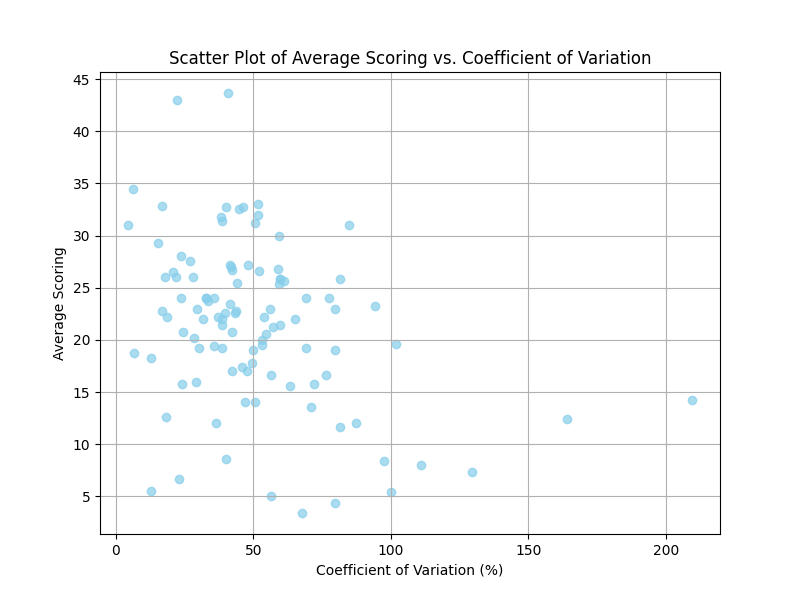

c:\Users\hyper\AppData\Local\Programs\Python\Python310\lib\site-packages\mplcursors\_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [25]:
%matplotlib widget
# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['CV'], df['Average'], color='skyblue', alpha=0.7)
plt.xlabel('Coefficient of Variation (%)')
plt.ylabel('Average Scoring')
plt.title('Scatter Plot of Average Scoring vs. Coefficient of Variation')
plt.grid(True)

# Annotate points with player names
annot = mplcursors.cursor(scatter, hover=True)
annot.connect("add", lambda sel: sel.annotation.set_text(df['Name'][sel.target.index]))

plt.show()